<h1> Analysis of Datasets </h1>
<h2> Using Logistic Regression and Naive Bayes </h2>

<h2>Dataset 3: Mammographic Mass </h2>

Dataset obtained from: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass

Approach:  We first prepare the dataset to train both the models. We then train the model and compare the performance of both the algorithms. 

<h2> Section 1: Preparing the Data </h2>
<h3> Loading the dataset </h3>

In [1]:
#loading the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path = 'Datasets/mammographic_masses.data'
headerData = ["BI-RADS","Age","Shape","Margin","Density","Severity"]
rawFileData = pd.read_csv(path, names = headerData)

<h3> Data Overview </h3>
Lets overview our dataset by displaying the top ten records

In [2]:
rawFileData.head(10)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1
5,4,65,1,?,3,0
6,4,70,?,?,3,0
7,5,42,1,?,3,0
8,5,57,1,5,3,1
9,5,60,?,5,1,1


We see that there are some missing values. 
We remove all the rows which have missing values.

<h3>Cleaning the data by removing rows with missing values</h3>

In [3]:
#removing rows with missing values
rawFileData = rawFileData[(rawFileData.values != '?').all(axis=1)]

<h3> Converting all data values to float </h3>

In [4]:
for cols in headerData:
    rawFileData[cols] = rawFileData[cols].astype(float)

<h3> Displaying basic statisics about the data </h3>

In [5]:
rawFileData.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


<h3> Extracting the labels </h3>


In [6]:
#get label column from dataframe
Y = rawFileData['Severity']
#converting to numpy array
Y_labels = Y.to_numpy()
#removing labels col from rest of dataframe
rawFileData.drop(['Severity'],axis=1, inplace=True)

<h3> Extracting the data </h3>

In [7]:
X_data = rawFileData.to_numpy()

<h2> Section 2: Implementing the Models </h2>

The models have been implemented in a separate file. 
We import these modules to work with them.

In [8]:
#importing the implementation for the algorithms
import L_Regression
import N_Bayes


#making a class instance
logistic = L_Regression.LogisticRegression()
naive = N_Bayes.NaiveBayes()

<h2> Section 3: Running Experiments </h2>

We run the experiments stated in the project requirements.

<h2> EXPERIMENT 1: Compare the accuracy of naive Bayes and logistic regression </h2>

<h3> Fitting the models </h3>


In [9]:
AccuracyTrace = logistic.fit(X_data,Y_labels)
naive.fit(X_data, Y_labels)

<h3> Accuracy of Logistic Regression </h3>

In [10]:
logistic.evaluate_acc(Y_labels, logistic.predict(X_data))

0.6216867469879518

Hence, our Logistic Regression model has an accuracy of 62.17% on the given dataset.

<h3> Accuracy of Naive Bayes </h3>

In [11]:
naive.evaluate_acc(Y_labels, naive.predict(X_data))

0.8156626506024096

Hence, our Logistic Regression model has an accuracy of 81.57% on the given dataset.

Experiment 1 concludes that Naive Bayes is more accurate than Logistic Regression for this dataset.

<h2> EXPERIMENT 2: Test different learning rates for gradient descent applied to logistic regression </h2>


<h4> 1. Learning Rate vs Accuracy </h4>

In [12]:
learning_rates = [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10]

In [13]:
accuracy = []
for rates in learning_rates:
    accuracy.append(logistic.fit(X_data, Y_labels, rates).pop())
table1 = pd.DataFrame({'Learning Rate' : learning_rates, 'Final Accuracy' : accuracy})

In [14]:
table1

,Learning Rate,Final Accuracy
0,0.00001,0.701205
1,0.00010,0.714458
2,0.00100,0.704819
3,0.01000,0.621687
4,0.10000,0.543373
5,1.00000,0.514458
6,10.00000,0.514458


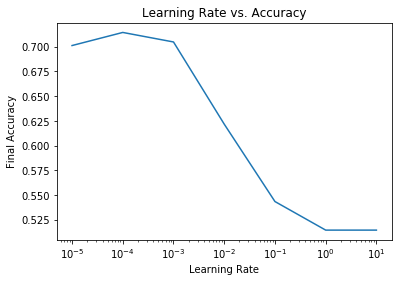

In [15]:
plt.xlabel('Learning Rate') 
plt.ylabel('Final Accuracy') 
plt.title('Learning Rate vs. Accuracy') 
plt.plot(learning_rates, accuracy)
plt.xscale("log")
plt.show()

<h4> 2. Number of Iterations vs Accuracy </h4>

In [16]:
count=0
Iteration = []
for i in AccuracyTrace:
    count = count + 1
    Iteration.append(count)

In [17]:
table2 = pd.DataFrame({'Iteration' : Iteration, 'Accuracy' : AccuracyTrace})

In [18]:
table2

,Iteration,Accuracy
0,1,0.514458
1,2,0.514458
2,3,0.514458
3,4,0.515663
4,5,0.519277
...,...,...
495,496,0.621687
496,497,0.621687
497,498,0.621687
498,499,0.621687


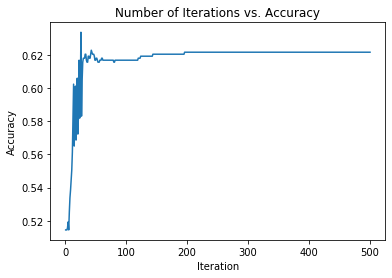

In [19]:
plt.xlabel('Iteration') 
plt.ylabel('Accuracy') 
plt.title('Number of Iterations vs. Accuracy') 
plt.plot(Iteration, AccuracyTrace)
plt.show()

<h2> EXPERIMENT 3: Compare the accuracy of the two models as a function of the size of dataset </h2>


<h3> 1. Logistic Regression </h3>

In [20]:
percentageTrainingSize = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
dataSize = []
percentages = []
for per in percentageTrainingSize:
    dataSize.append(per*X_data.shape[0])
    percentages.append(str(per*100)+"%")


In [21]:
dataSize = [int(i) for i in dataSize]

In [22]:
Acc = []
for size in dataSize:
    Acc.append(logistic.fit(X_data[1:size], Y_labels[1:size]).pop())

In [23]:
table3 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc})

In [24]:
table3

,Dataset Size (%),Accuracy
0,20.0%,0.557576
1,30.0%,0.592742
2,40.0%,0.592145
3,50.0%,0.606280
4,60.0%,0.631791
5,70.0%,0.625862
6,80.0%,0.615385
7,90.0%,0.623324
8,100%,0.622437


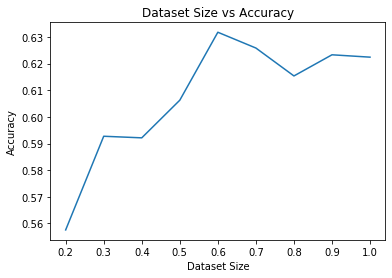

In [25]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc)
plt.show()

<h3> 2. Naive Bayes </h3>

In [26]:
Acc2 = []
for size in dataSize:
    Acc2.append(naive.evaluate_acc(Y_labels[1:size], naive.predict(X_data[1:size])))

In [27]:
table4 = pd.DataFrame({'Dataset Size (%)' : percentages, 'Accuracy' : Acc2})

In [28]:
table4

,Dataset Size (%),Accuracy
0,20.0%,0.775758
1,30.0%,0.806452
2,40.0%,0.818731
3,50.0%,0.826087
4,60.0%,0.814889
5,70.0%,0.812069
6,80.0%,0.811463
7,90.0%,0.820375
8,100%,0.815440


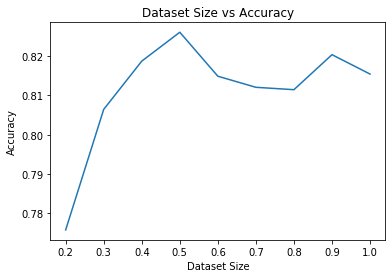

In [29]:
plt.xlabel('Dataset Size') 
plt.ylabel('Accuracy') 
plt.title('Dataset Size vs Accuracy') 
plt.plot(percentageTrainingSize, Acc2)
plt.show()